In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(20256000, 3)


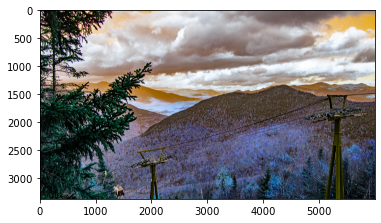

In [13]:
img = cv2.imread('img.jpg')
l,w,ch = img.shape
vec = img.reshape(-1,ch).astype(int)
print(vec.shape)
plt.imshow(img)
plt.show()

In [14]:
def choose_random(k, vec):
    m = len(vec)
    idx = np.random.randint(0,m,k)
    return vec[idx]

def cluster_assignment(mu, vec):
    return ((vec-mu[:,np.newaxis]) **2).sum(axis=2).argmin(axis=0)

def move_centroid(mu, c, vec):
    for i in range(len(mu)):
        vec_sub = vec[c==i]
        mu[i] = np.mean(vec_sub, axis=0)
    return mu

def distortion(mu, c, vec):
    return ((mu[c]-vec)**2).sum() / vec.shape[0]

def distance(x_1, x_2):
    return np.matmul((x_1-x_2), (x_1-x_2).transpose())
    
def k_means(img, K, plot=True, verbose=False):
    l, w, ch = img.shape
    vec_img = img.reshape(-1, ch).astype(int)
    mu = choose_random(K, vec_img)
    c = cluster_assignment(mu, vec_img)
    last_dist = distortion(mu, c, vec_img) + 100
    curr_dist = last_dist - 100
    history = [curr_dist]
    while last_dist - curr_dist > 1:
        last_dist = curr_dist
        c = cluster_assignment(mu, vec_img)
        if verbose:
            print(curr_dist)
        mu = move_centroid(mu, c, vec_img)    
        curr_dist = distortion(mu, c, vec_img)
        history.append(curr_dist)
    if plot:
        img_compressed = mu[c].reshape(img.shape)
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(img)
        plt.title('original image')
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.imshow(img_compressed)
        plt.title('compressed image')
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.plot(range(len(history)), history)
        plt.title('distortion over iterations')
        plt.xlabel('iterations')
        plt.ylabel('distortion')
    return mu, c, history[-1]

In [15]:
def elbow(img):
    K_hist = []
    dist_hist = []
    for K in range(2, 10):
        K_hist.append(K)
        mu, c, dist = k_means(img, K, plot=False)
        dist_hist.append(dist)
    plt.plot(K_hist, dist_hist)
    plt.xlabel("K")
    plt.ylabel("final distortion")

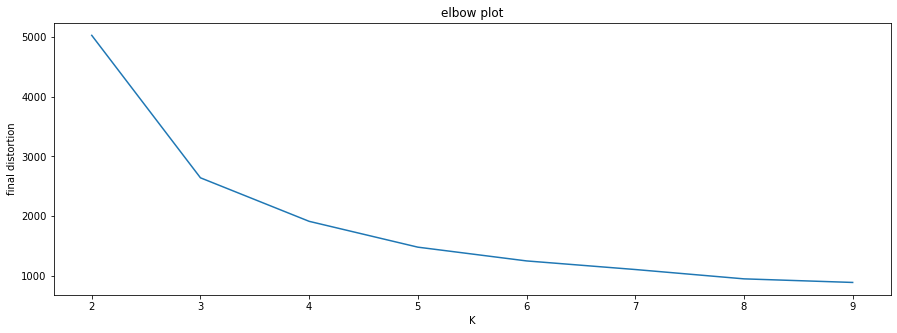

In [16]:
plt.figure(figsize=(15, 5))

plt.title('elbow plot')
elbow(img)